In [2]:
%%capture
%pip install neqsim

#To check for methods in a Java object 
#from neqsim import methods

# Experimental data
Experimental data from a number of sources was collected for the data.

In [3]:
import pandas as pd
expdata_df = pd.read_csv('../../../data/thermodynamics/VLE/methane-water.csv')
expdata_df

,ID,ComponentSolute,ComponentSolvent,x1,StandardDeviation,x2,Pressure,VapourPressure2,Type,Temperature,Reference
0,134,methane,water,0.001560,1.000000e-01,0.998440,73.6,0,VLE,293.15,Addicks2001
1,135,methane,water,0.002010,1.000000e-01,0.997990,102.2,0,VLE,293.15,Addicks2001
2,136,methane,water,0.002400,1.000000e-01,0.997600,139.2,0,VLE,293.15,Addicks2001
3,137,methane,water,0.002740,1.000000e-01,0.997260,178.2,0,VLE,293.15,Addicks2001
4,150,methane,water,0.000033,3.320000e-07,0.999967,1.0,1,VLE,283.15,Perry1998
5,151,methane,water,0.000026,2.620000e-07,0.999974,1.0,1,VLE,293.15,Perry1998
6,152,methane,water,0.000022,2.200000e-07,0.999978,1.0,1,VLE,303.15,Perry1998
7,153,methane,water,0.000019,1.900000e-07,0.999981,1.0,1,VLE,313.15,Perry1998
8,154,methane,water,0.000017,1.710000e-07,0.999983,1.0,1,VLE,323.15,Perry1998
9,155,methane,water,0.000016,1.580000e-07,0.999984,1.0,1,VLE,333.15,Perry1998


In [4]:
referenceList = expdata_df['Reference'].unique().tolist()
temperatureList = expdata_df['Temperature'].unique().tolist()
data = expdata_df.groupby(['Temperature'])['Pressure'].count()
print('references ', referenceList)
print('temperature ', temperatureList)
print('numer of data points for each temperature:')
print(data)

references  ['Addicks2001', 'Perry1998']
temperature  [293.15, 283.15, 303.15, 313.15, 323.15, 333.15, 343.15]
numer of data points for each temperature:
Temperature
283.15     7
293.15    11
303.15     7
313.15     7
323.15     7
333.15     7
343.15     7
Name: Pressure, dtype: int64


<Figure size 640x480 with 0 Axes>

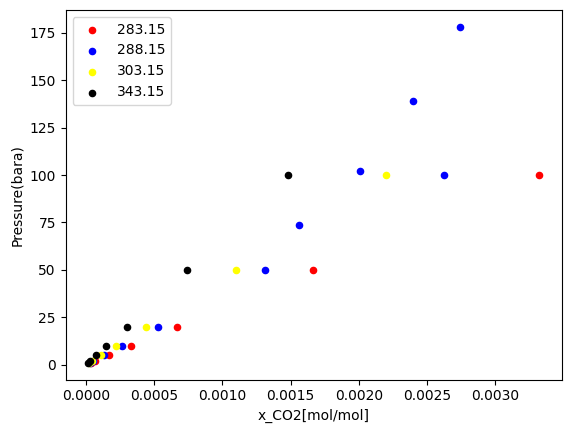

In [8]:
from matplotlib import pyplot as plt
fig = plt.figure()

data283 = expdata_df.loc[expdata_df['Temperature'] == 283.15]
plot1 = data283.plot(x='x1', y='Pressure', kind='scatter',ylabel='Pressure(bara)', xlabel='x_CO2[mol/mol]',color='red')

data288 = expdata_df.loc[expdata_df['Temperature'] == 293.15]
data288.plot(ax=plot1, x='x1', y='Pressure', kind='scatter',ylabel='Pressure(bara)', xlabel='x_CO2[mol/mol]',color='blue')

data323 = expdata_df.loc[expdata_df['Temperature'] == 303.15]
data323.plot(ax=plot1, x='x1', y='Pressure', kind='scatter',ylabel='Pressure(bara)', xlabel='x_CO2[mol/mol]',color='yellow')

data373 = expdata_df.loc[expdata_df['Temperature'] == 343.15]
data373.plot(ax=plot1, x='x1', y='Pressure', kind='scatter',ylabel='Pressure(bara)', xlabel='x_CO2[mol/mol]',color='black')			

plt.legend(['283.15', '288.15', '303.15', '343.15'])
plt.show()

# Evaluation of experimental data

In this section the experimental data will be evaluated and eventual some data sets will be removed from the set.

In [9]:
# The data set of Nighswander1989 will be removed
expdata_df_update = expdata_df.loc[expdata_df['Reference'] != 'Nighswander1989']
expdata_df_update

,ID,ComponentSolute,ComponentSolvent,x1,StandardDeviation,x2,Pressure,VapourPressure2,Type,Temperature,Reference
0,134,methane,water,0.001560,1.000000e-01,0.998440,73.6,0,VLE,293.15,Addicks2001
1,135,methane,water,0.002010,1.000000e-01,0.997990,102.2,0,VLE,293.15,Addicks2001
2,136,methane,water,0.002400,1.000000e-01,0.997600,139.2,0,VLE,293.15,Addicks2001
3,137,methane,water,0.002740,1.000000e-01,0.997260,178.2,0,VLE,293.15,Addicks2001
4,150,methane,water,0.000033,3.320000e-07,0.999967,1.0,1,VLE,283.15,Perry1998
5,151,methane,water,0.000026,2.620000e-07,0.999974,1.0,1,VLE,293.15,Perry1998
6,152,methane,water,0.000022,2.200000e-07,0.999978,1.0,1,VLE,303.15,Perry1998
7,153,methane,water,0.000019,1.900000e-07,0.999981,1.0,1,VLE,313.15,Perry1998
8,154,methane,water,0.000017,1.710000e-07,0.999983,1.0,1,VLE,323.15,Perry1998
9,155,methane,water,0.000016,1.580000e-07,0.999984,1.0,1,VLE,333.15,Perry1998


# Compare to NeqSim Calculations

## NeqSim calculations at 288.15 K

<Figure size 640x480 with 0 Axes>

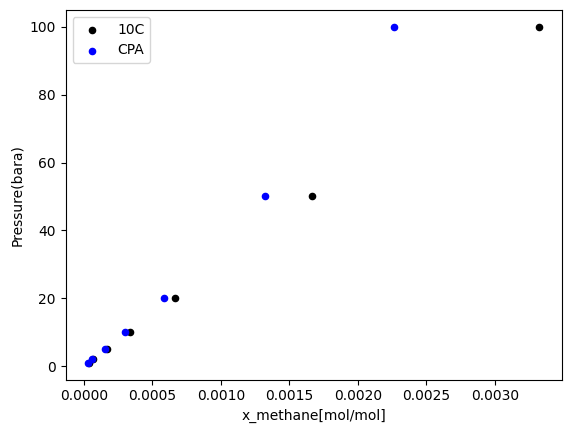

In [11]:
import neqsim
from neqsim.thermo.thermoTools import fluid, TPflash, fluidComposition,bubp
import pandas as pd
import numpy as np

# Creating a fluid in neqsim
fluid1 = fluid('cpa') #create a fluid using the SRK-EoS
fluid1.addComponent('methane', 1.0)
fluid1.addComponent("water", 1.0) 
fluid1.autoSelectMixingRule()
fluid1.setTemperature(15.0, 'C')

def solubility(pres):
    fluid1.setPressure(pres, 'bara')
    TPflash(fluid1)
    return fluid1.getPhase('aqueous').getComponent('methane').getx()

pressures = data283['Pressure'].values.tolist()
x_res = [solubility(P) for P in pressures]

dataWithExperiment = data283.assign(x_CPA = x_res)

from matplotlib import pyplot as plt
fig = plt.figure()	
plot1 = data283.plot(x='x1', y='Pressure', kind='scatter',ylabel='Pressure(bara)', xlabel='x_methane[mol/mol]',color='black')	
dataWithExperiment.plot(ax=plot1, x='x_CPA', y='Pressure', kind='scatter',ylabel='Pressure(bara)', xlabel='x_methane[mol/mol]',color='blue')	
plt.legend(['10C', 'CPA'])
plt.show()

## Check to all data

In [12]:
import neqsim
from neqsim.thermo.thermoTools import fluid, TPflash, fluidComposition,bubp
import pandas as pd
import numpy as np

fluid1 = fluid('cpa')
fluid1.addComponent('methane', 1.0)
fluid1.addComponent("water", 1.0) 
fluid1.autoSelectMixingRule()
fluid1.setTemperature(15.0, 'C')

def solubility(inp):
    fluid1.setPressure(inp[2], 'bara')
    fluid1.setTemperature(inp[1], 'K')
    try:
        TPflash(fluid1)
        return fluid1.getPhase('aqueous').getComponent('methane').getx()
    except:
        return float('nan')
    
inpdata = expdata_df[['x1', 'Temperature', 'Pressure']].values.tolist()
solres = [solubility(inp) for inp in inpdata]
dataWithExperiment = expdata_df.assign(x_CPA = solres)

devdf = (dataWithExperiment['x_CPA'] - dataWithExperiment['x1']) / dataWithExperiment['x1']*100.0

dataWithExperimentAndDev = dataWithExperiment.assign(dev = devdf.values)

print('median average deviation ', devdf.mad(axis=0))

dataWithExperimentAndDev.to_csv('./water-methane-exp.csv')

median average deviation  7.246513870606801


/tmp/ipykernel_2035/200205163.py:29: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print('median average deviation ', devdf.mad(axis=0))


# Parameter fitting

model  CPAs-SRK-EOS-statoil
mixing rule  classic-CPA_T
kij  -0.827413423
kijT  0.0026055


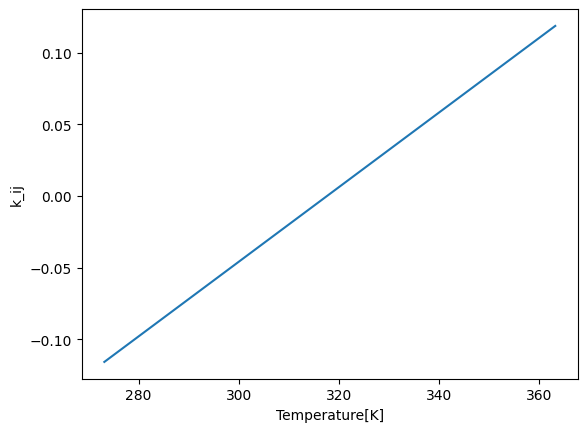

In [13]:
# return intparam[i][j] + intparamT[i][j] * temperature
print('model ', fluid1.getModelName())
print('mixing rule ', fluid1.getMixingRuleName())
print('kij ', fluid1.getPhase(1).getMixingRule().getBinaryInteractionParameter(0,1))
print('kijT ', fluid1.getPhase(1).getMixingRule().getBinaryInteractionParameterT1(0,1))

kij = fluid1.getPhase(1).getMixingRule().getBinaryInteractionParameter(0,1)
kijT = fluid1.getPhase(1).getMixingRule().getBinaryInteractionParameterT1(0,1)

def calcKIJ(temp):
    return kij+kijT*temp

temperatures = np.arange(273.15, 373.15, 10.0)#range(273.0, 373.15, 10.0)
kijcalc = [calcKIJ(T) for T in temperatures]

plt.plot(temperatures, kijcalc)
plt.xlabel('Temperature[K]')
plt.ylabel('k_ij')
plt.show()

## Manual fiting

average deviation  -17.22395541033987


<Figure size 640x480 with 0 Axes>

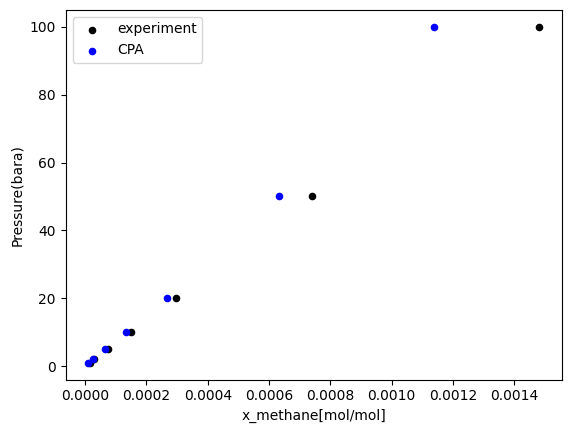

In [15]:
#set datafram for testing model
inpdata = data373

import neqsim
from neqsim.thermo.thermoTools import fluid, TPflash, fluidComposition,bubp
import pandas as pd
import numpy as np

fluid1 = fluid('cpa')
fluid1.addComponent('methane', 1.0)
fluid1.addComponent("water", 1.0) 
fluid1.autoSelectMixingRule()
fluid1.setTemperature(15.0, 'C')

fluid1.getPhase(0).getMixingRule().setBinaryInteractionParameter(0,1, 0.0950001306904282)
fluid1.getPhase(1).getMixingRule().setBinaryInteractionParameter(0,1, 0.0950011306904282)
fluid1.getPhase(1).getMixingRule().setBinaryInteractionParameterT1(0,1, 0)
fluid1.getPhase(1).getMixingRule().setBinaryInteractionParameterT1(0,1, 0)

def solubility(inp):
    fluid1.setPressure(inp[2], 'bara')
    fluid1.setTemperature(inp[1], 'K')
    try:
        TPflash(fluid1)
        return fluid1.getPhase('aqueous').getComponent('methane').getx()
    except:
        return float('nan')
    
inpdataList = inpdata[['x1', 'Temperature', 'Pressure']].values.tolist()
solres = [solubility(inp) for inp in inpdataList]
dataWithExperiment = inpdata.assign(x_CPA_fitted = solres)

devdf = (dataWithExperiment['x_CPA_fitted'] - dataWithExperiment['x1']) / dataWithExperiment['x1']*100.0

dataWithExperimentAndDev = dataWithExperiment.assign(dev_fitted = devdf.values)

print('average deviation ', devdf.mean(axis=0))

dataWithExperimentAndDev.to_csv('./water-CO2-exp-fitted.csv')

from matplotlib import pyplot as plt
fig = plt.figure()	
plot1 = inpdata.plot(x='x1', y='Pressure', kind='scatter',ylabel='Pressure(bara)', xlabel='x_methane[mol/mol]',color='black')	
dataWithExperimentAndDev.plot(ax=plot1, x='x_CPA_fitted', y='Pressure', kind='scatter',ylabel='Pressure(bara)', xlabel='x_methane[mol/mol]',color='blue')	
plt.legend(['experiment', 'CPA'])
plt.show()

# optimized results

288.15K : kij =  0.0282  (neqsim 0.038)
323.15K : kij =  0.069   (neqsim 0.08)
373.15 : kij = 0.095  (neqsim 0.13)

In [16]:
from sklearn.linear_model import LinearRegression


x = np.array([288.15, 323.15, 373.15]).reshape((-1, 1))
y = np.array([0.0282, 0.069, 0.095])
model = LinearRegression()
model.fit(x, y)
print(f"kij: {model.intercept_}")
print(f"kijT: {model.coef_}")

kij: -0.1878446484018264
kijT: [0.00076767]


## Test new parameters

In [18]:
import neqsim
from neqsim.thermo.thermoTools import fluid, TPflash, fluidComposition,bubp
import pandas as pd
import numpy as np

fluid1 = fluid('cpa')
fluid1.addComponent('methane', 1.0)
fluid1.addComponent("water", 1.0) 
fluid1.autoSelectMixingRule()
fluid1.setTemperature(15.0, 'C')

fluid1.getPhase(0).getMixingRule().setBinaryInteractionParameter(0,1, -0.187844648401)
fluid1.getPhase(1).getMixingRule().setBinaryInteractionParameter(0,1, -0.187844648401)
fluid1.getPhase(1).getMixingRule().setBinaryInteractionParameterT1(0,1, 0.00076767)
fluid1.getPhase(1).getMixingRule().setBinaryInteractionParameterT1(0,1, 0.00076767)

def solubility(inp):
    fluid1.setPressure(inp[2], 'bara')
    fluid1.setTemperature(inp[1], 'K')
    try:
        TPflash(fluid1)
        return fluid1.getPhase('aqueous').getComponent('methane').getx()
    except:
        return float('nan')
    
inpdata = expdata_df[['x1', 'Temperature', 'Pressure']].values.tolist()
solres = [solubility(inp) for inp in inpdata]
dataWithExperiment = expdata_df.assign(x_CPA = solres)

devdf = (dataWithExperiment['x_CPA'] - dataWithExperiment['x1']) / dataWithExperiment['x1']*100.0

dataWithExperimentAndDev = dataWithExperiment.assign(dev = devdf.values)

print('median average deviation ', devdf.mad(axis=0))

dataWithExperimentAndDev.to_csv('./water-methane-exp-fitted2.csv')

median average deviation  14.400706869367884


/tmp/ipykernel_2035/1520280405.py:34: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  print('median average deviation ', devdf.mad(axis=0))


## Automatic fitting